In [67]:
# Reloads modules as they are changed.
%load_ext autoreload
%autoreload 2

In [68]:
import os
from pathlib import Path
import sys

import numpy as np
import pandas as pd
import seaborn as sns

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode

# init_notebook_mode(connected=True)

sys.path.append("..")

from src.data import make_dataset
from src.model import model_pipeline

/anaconda3/envs/amazon_cv/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning:

covariance is not symmetric positive-semidefinite.



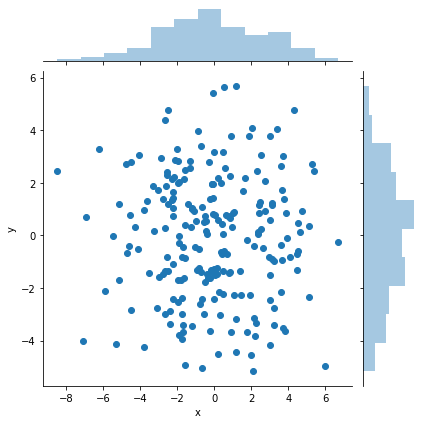

In [53]:
mean, cov = [0, 0], [(0, 5), (7, 0)]
n = len(df)
data = np.random.multivariate_normal(mean, cov, n)

df_test = pd.DataFrame(data, columns=["x", "y"])
sns.jointplot(x="x", y="y", data=df_test)

### Testing Lat Lon Generation

Using map of airports as example

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)


fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['cnt'],
            cmax = df['cnt'].max(),
            colorbar_title="Incoming flights<br>February 2011"
        )))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [104]:
df = make_dataset.add_random_lat_lon(df, [-3, -62])

In [105]:
fig = go.Figure(data=go.Scattergeo(
#         locationmode = 'USA-states',
        lon = df['lon'],
        lat = df['lat'],
#         text = df['text'],
        mode = 'markers',
        marker = dict(
            size = 4,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = df['cnt'],
            cmax = df['cnt'].max(),
#             colorbar_title="Incoming flights<br>February 2011"
        )))

fig.update_layout(
        title = 'Random lat lon in South America',
        geo = dict(
            scope='south america',
#             projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

### Assign lat lon to each image

In [115]:
df = model_pipeline.load_dependent_vars()

print(df.shape)
df.head()

(1505, 18)


,image_name,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_10,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0
3,train_100,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
4,train_1000,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [116]:
df_lat_lon = pd.DataFrame(df.image_name)
df_lat_lon

,image_name
0,train_0
1,train_1
2,train_10
3,train_100
4,train_1000
...,...
1500,train_11347
1501,train_11348
1502,train_11349
1503,train_1135


In [117]:
df_lat_lon = make_dataset.add_random_lat_lon(df_lat_lon, [-3, -62])

df_lat_lon.head()

,image_name,lat,lon
0,train_0,-3.071458,-60.516524
1,train_1,-1.998991,-58.990579
2,train_10,-0.820273,-63.351128
3,train_100,-1.762132,-55.031611
4,train_1000,-2.476780,-70.701845


In [118]:
make_dataset.save_data(df_lat_lon, 'processed', 'processed_lat_lon.csv')